<a href="https://colab.research.google.com/github/lotrmay/TensorFlow_Learning/blob/master/bc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Výstupní stream byl oříznut na posledních 5000 řádků.
Epoch 503/3000
212/212 [==============================] - 1s 2ms/step - loss: 0.6455 - accuracy: 0.6321 - val_loss: 0.6013 - val_accuracy: 0.6888
Epoch 504/3000
212/212 [==============================] - 0s 2ms/step - loss: 0.6356 - accuracy: 0.6433 - val_loss: 0.6038 - val_accuracy: 0.6779
Epoch 505/3000
212/212 [==============================] - 1s 2ms/step - loss: 0.6358 - accuracy: 0.6426 - val_loss: 0.6006 - val_accuracy: 0.6867
Epoch 506/3000
212/212 [==============================] - 0s 2ms/step - loss: 0.6393 - accuracy: 0.6387 - val_loss: 0.6006 - val_accuracy: 0.6871
Epoch 507/3000
212/212 [==============================] - 0s 2ms/step - loss: 0.6404 - accuracy: 0.6336 - val_loss: 0.6023 - val_accuracy: 0.6830
Epoch 508/3000
212/212 [==============================] - 1s 2ms/step - loss: 0.6340 - accuracy: 0.6484 - val_loss: 0.6013 - val_accuracy: 0.6800
Epoch 509/3000
212/212 [==============================] - 1s 2ms/step 

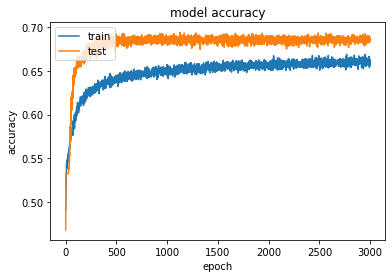

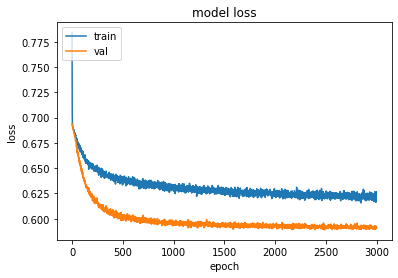

In [12]:
%tensorflow_version 2.x
import tensorflow as tf
from __future__ import absolute_import, division, print_function, unicode_literals
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import numpy as np #better arrays in python, lepší práce s multidimenzionálními poli
import pandas as pd #data analytics tool, lepší manipulace s daty, dokáže například cut outnout column
import matplotlib.pyplot as plt #vizualizace tabulek a grafů
from IPython.display import clear_output #jen pro tenhle notebook
from six.moves import urllib
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import utils as np_utils
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
import keras






CSV_COLUMN_NAMES=['Odds_firstTeam','Odds_secondTeam','Rank_firstTeam','Rank_secondTeam','WinRate_firstTeam','WinRate_secondTeam','PistolWinRate_firstTeam','PistolWinRate_secondTeam',
                  'playerAARating','playerAADpr','playerAAKast','playerAAImpact','playerAAAdr','playerAAKpr','playerAAHs','playerAAKD','playerAAGrenadeDmg',
                  'playerABRating','playerABDpr','playerABKast','playerABImpact','playerABAdr','playerABKpr','playerABHs','playerABKD','playerABGrenadeDmg',
                  'playerACRating','playerACDpr','playerACKast','playerACImpact','playerACAdr','playerACKpr','playerACHs','playerACKD','playerACGrenadeDmg',
                  'playerADRating','playerADDpr','playerADKast','playerADImpact','playerADAdr','playerADKpr','playerADHs','playerADKD','playerADGrenadeDmg',
                  'playerAERating','playerAEDpr','playerAEKast','playerAEImpact','playerAEAdr','playerAEKpr','playerAEHs','playerAEKD','playerAEGrenadeDmg',
                  'playerBARating','playerBADpr','playerBAKast','playerBAImpact','playerBAAdr','playerBAKpr','playerBAHs','playerBAKD','playerBAGrenadeDmg',
                  'playerBBRating','playerBBDpr','playerBBKast','playerBBImpact','playerBBAdr','playerBBKpr','playerBBHs','playerBBKD','playerBBGrenadeDmg',
                  'playerBCRating','playerBCDpr','playerBCKast','playerBCImpact','playerBCAdr','playerBCKpr','playerBCHs','playerBCKD','playerBCGrenadeDmg',
                  'playerBDRating','playerBDDpr','playerBDKast','playerBDImpact','playerBDAdr','playerBDKpr','playerBDHs','playerBDKD','playerBDGrenadeDmg',
                  'playerBERating','playerBEDpr','playerBEKast','playerBEImpact','playerBEAdr','playerBEKpr','playerBEHs','playerBEKD','playerBEGrenadeDmg','Match_link','Result','team_one_name','team_two_name']

CSV_COLUMN_NAMES2=['Odds_firstTeam','Odds_secondTeam','Rank_firstTeam','Rank_secondTeam','WinRate_firstTeam','WinRate_secondTeam','PistolWinRate_firstTeam','PistolWinRate_secondTeam',
                  'playerAARating','playerAADpr','playerAAKast','playerAAImpact','playerAAAdr','playerAAKpr','playerAAHs','playerAAKD','playerAAGrenadeDmg',
                  'playerABRating','playerABDpr','playerABKast','playerABImpact','playerABAdr','playerABKpr','playerABHs','playerABKD','playerABGrenadeDmg',
                  'playerACRating','playerACDpr','playerACKast','playerACImpact','playerACAdr','playerACKpr','playerACHs','playerACKD','playerACGrenadeDmg',
                  'playerADRating','playerADDpr','playerADKast','playerADImpact','playerADAdr','playerADKpr','playerADHs','playerADKD','playerADGrenadeDmg',
                  'playerAERating','playerAEDpr','playerAEKast','playerAEImpact','playerAEAdr','playerAEKpr','playerAEHs','playerAEKD','playerAEGrenadeDmg',
                  'playerBARating','playerBADpr','playerBAKast','playerBAImpact','playerBAAdr','playerBAKpr','playerBAHs','playerBAKD','playerBAGrenadeDmg',
                  'playerBBRating','playerBBDpr','playerBBKast','playerBBImpact','playerBBAdr','playerBBKpr','playerBBHs','playerBBKD','playerBBGrenadeDmg',
                  'playerBCRating','playerBCDpr','playerBCKast','playerBCImpact','playerBCAdr','playerBCKpr','playerBCHs','playerBCKD','playerBCGrenadeDmg',
                  'playerBDRating','playerBDDpr','playerBDKast','playerBDImpact','playerBDAdr','playerBDKpr','playerBDHs','playerBDKD','playerBDGrenadeDmg',
                  'playerBERating','playerBEDpr','playerBEKast','playerBEImpact','playerBEAdr','playerBEKpr','playerBEHs','playerBEKD','playerBEGrenadeDmg','team_one_name','team_two_name']
RESULTS=['0','1']


train=pd.read_csv('/content/pokus.csv',sep=";",names=CSV_COLUMN_NAMES,error_bad_lines=False,header=None)
print(train.shape)

train['team_one_name']=pd.Categorical(train['team_one_name']).codes
train['team_two_name']=pd.Categorical(train['team_two_name']).codes

#train_y=train.pop('Result')
#test_y=test.pop('Result')
train.pop('Match_link')
train.pop('team_one_name')
train.pop('team_two_name')

'''
train.pop('playerAAGrenadeDmg')
train.pop('playerABGrenadeDmg')
train.pop('playerACGrenadeDmg')
train.pop('playerADGrenadeDmg')
train.pop('playerAEGrenadeDmg')
train.pop('playerBAGrenadeDmg')
train.pop('playerBBGrenadeDmg')
train.pop('playerBCGrenadeDmg')
train.pop('playerBDGrenadeDmg')
train.pop('playerBEGrenadeDmg')

train.pop('playerAAKast')
train.pop('playerABKast')
train.pop('playerACKast')
train.pop('playerADKast')
train.pop('playerAEKast')
train.pop('playerBAKast')
train.pop('playerBBKast')
train.pop('playerBCKast')
train.pop('playerBDKast')
train.pop('playerBEKast')








train.pop('playerAAKD')
train.pop('playerABKD')
train.pop('playerACKD')
train.pop('playerADKD')
train.pop('playerAEKD')
train.pop('playerBAKD')
train.pop('playerBBKD')
train.pop('playerBCKD')
train.pop('playerBDKD')
train.pop('playerBEKD')

train.pop('playerAAAdr')
train.pop('playerABAdr')
train.pop('playerACAdr')
train.pop('playerADAdr')
train.pop('playerAEAdr')
train.pop('playerBAAdr')
train.pop('playerBBAdr')
train.pop('playerBCAdr')
train.pop('playerBDAdr')
train.pop('playerBEAdr')



#


train.pop('playerAADpr')
train.pop('playerABDpr')
train.pop('playerACDpr')
train.pop('playerADDpr')
train.pop('playerAEDpr')
train.pop('playerBADpr')
train.pop('playerBBDpr')
train.pop('playerBCDpr')
train.pop('playerBDDpr')
train.pop('playerBEDpr')

train.pop('playerAAKpr')
train.pop('playerABKpr')
train.pop('playerACKpr')
train.pop('playerADKpr')
train.pop('playerAEKpr')
train.pop('playerBAKpr')
train.pop('playerBBKpr')
train.pop('playerBCKpr')
train.pop('playerBDKpr')
train.pop('playerBEKpr')

train.pop('playerAAImpact')
train.pop('playerABImpact')
train.pop('playerACImpact')
train.pop('playerADImpact')
train.pop('playerAEImpact')
train.pop('playerBAImpact')
train.pop('playerBBImpact')
train.pop('playerBCImpact')
train.pop('playerBDImpact')
train.pop('playerBEImpact')

train.pop('playerAAHs')
train.pop('playerABHs')
train.pop('playerACHs')
train.pop('playerADHs')
train.pop('playerAEHs')
train.pop('playerBAHs')
train.pop('playerBBHs')
train.pop('playerBCHs')
train.pop('playerBDHs')
train.pop('playerBEHs')

train.pop('playerAARating')
train.pop('playerABRating')
train.pop('playerACRating')
train.pop('playerADRating')
train.pop('playerAERating')
train.pop('playerBARating')
train.pop('playerBBRating')
train.pop('playerBCRating')
train.pop('playerBDRating')
train.pop('playerBERating')
'''
print(train.shape)
target_column = ['Result'] 
predictors = list(set(list(train.columns))-set(target_column))
scaler = MinMaxScaler(feature_range=(0.01, 0.99))
norm = StandardScaler()
train[predictors]=norm.fit_transform(train[predictors])
train[predictors] = scaler.fit_transform(train[predictors])


#train[predictors] = train[predictors]/train[predictors].max()

X = train[predictors].values
y = train[target_column].values
#print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=888)#32 #888
print(X_train.shape); print(X_test.shape)
#y_train = np_utils.to_categorical(y_train)
#y_test = np_utils.to_categorical(y_test)#tohle nepoužívám, protože mám sigmoid a výsledky můžou být jen 1 nebo 0, takže to není nutné dělat  z toho kategorizační vektory
count_classes = y_test.shape[1]


model = Sequential()
model.add(Dense(98, activation='relu'))
model.add(keras.layers.Dropout(0.8))
model.add(Dense(18, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(Dense(6, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))#binary sigmoid     categorical softmax


model.compile(optimizer=keras.optimizers.Adadelta(learning_rate=0.06), #keras.optimizers.SGD(learning_rate=0.01)
              loss='binary_crossentropy', 
              metrics=['accuracy'])
#change number of hidden layers and change the learning rate up to 0.9

#adadelta-lr 0.04 78 (bez grenadedmg a kast) 20 4 1 sigmoid binary crossentropy  1000 epochs a 64 batch size a 9 rs
#adadelta-lr 0.015 98 30 15 5 2 rs9 testsize 0.15 64batchsize  Accuracy on test data: 0.690095841884613% 
#adadelta-lr 0.02 98 35 15 2 rs17 testsize 0.15 64batchsize 0.15 test rate Accuracy on test data: 0.6890308856964111% 
#record accuracy má Adadelta(0.01), categorical_crossentropy 98,50,2 1000 epochs a 32 batch size
#record accuracy má adadelta(0.01) 86 random state 32 batch size a 1000 epochs  test accuracy: 0.674478
#adadelta zatím top
#binary_crossentropy
#categorical_crossentropy
# categorical_hinge 0.677
# hinge 0.667
# MeanAbsoluteError 0.654, 
# MeanAbsolutePercentageError 0.6814 

lof = LocalOutlierFactor(contamination=0.15,n_neighbors=1)
yhat = lof.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
print(X_train.shape, X_train.shape)

yhat = lof.fit_predict(X_test)
# select all rows that are not outliers
mask = yhat != -1
X_test, y_test = X_test[mask, :], y_test[mask]
print(X_test.shape, X_test.shape)


history = model.fit(X_train, y_train, epochs=3000,batch_size=64,validation_data=(X_test, y_test))

pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
pred_test= model.predict(X_test)



scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
#poznatky-vypadá to, že grenade damage každého hráče je nadbytečná a síť bez této informace vykazuje lepší výsledky





In [2]:
pd.set_option("display.max_rows", 999)
pd.set_option("display.max_columns", 999)
pd.set_option("expand_frame_repr", True)
pd.set_option("large_repr", "info")
model.layers[0].get_weights()[0][98]



SyntaxError: ignored

In [ ]:
from sklearn import metrics
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Accuracy: 0.6804511278195489


array([[0.4662069 , 0.69121951, 0.39888889, 0.45644444, 0.25645833,
        0.51814815, 0.60727811, 0.13558352, 0.5196    , 0.33219178,
        0.77222222, 0.63492754, 0.4216    , 0.35631579, 0.54016393,
        0.5975891 , 0.5       , 0.15182114, 0.23331858, 0.48833333,
        0.08647913, 0.55444444, 0.55313253, 0.36974684, 0.40057971,
        0.45658228, 0.40524862, 0.5784    , 0.01784   , 0.16372549,
        0.54323529, 0.28106383, 0.57157303, 0.65796053, 0.28856164,
        0.19553398, 0.45225641, 0.57145833, 0.2048538 , 0.25962264,
        0.49075472, 0.56341176, 0.481278  , 0.20398458, 0.42616438,
        0.99      , 0.58901528, 0.27004386, 0.62472727, 0.25343949,
        0.2171134 , 0.4216    , 0.41768   , 0.70772526, 0.22811912,
        0.17320769, 0.69227848, 0.58794872, 0.654     , 0.64406   ,
        0.44555556, 0.66763158, 0.36073684, 0.591875  , 0.598     ,
        0.29299465, 0.78636364, 0.64184211, 0.4726809 , 0.3216318 ,
        0.18662791, 0.12277778, 0.5605618 , 0.38

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


array([[0.5337931 , 0.53585366, 0.50777778, ..., 0.30352657, 0.62823009,
        0.13354108],
       [0.38172414, 0.39243902, 0.38333333, ..., 0.06207729, 0.45973451,
        0.0821813 ],
       [0.48310345, 0.48804878, 0.49222222, ..., 0.22777778, 0.52539823,
        0.09189802],
       ...,
       [0.56758621, 0.3804878 , 0.57      , ..., 0.21830918, 0.47460177,
        0.07385269],
       [0.5337931 , 0.57170732, 0.60111111, ..., 0.33193237, 0.61707965,
        0.09467422],
       [0.55068966, 0.45219512, 0.49222222, ..., 0.27985507, 0.51920354,
        0.12521246]])>]
Consider rewriting this model with the Functional API.


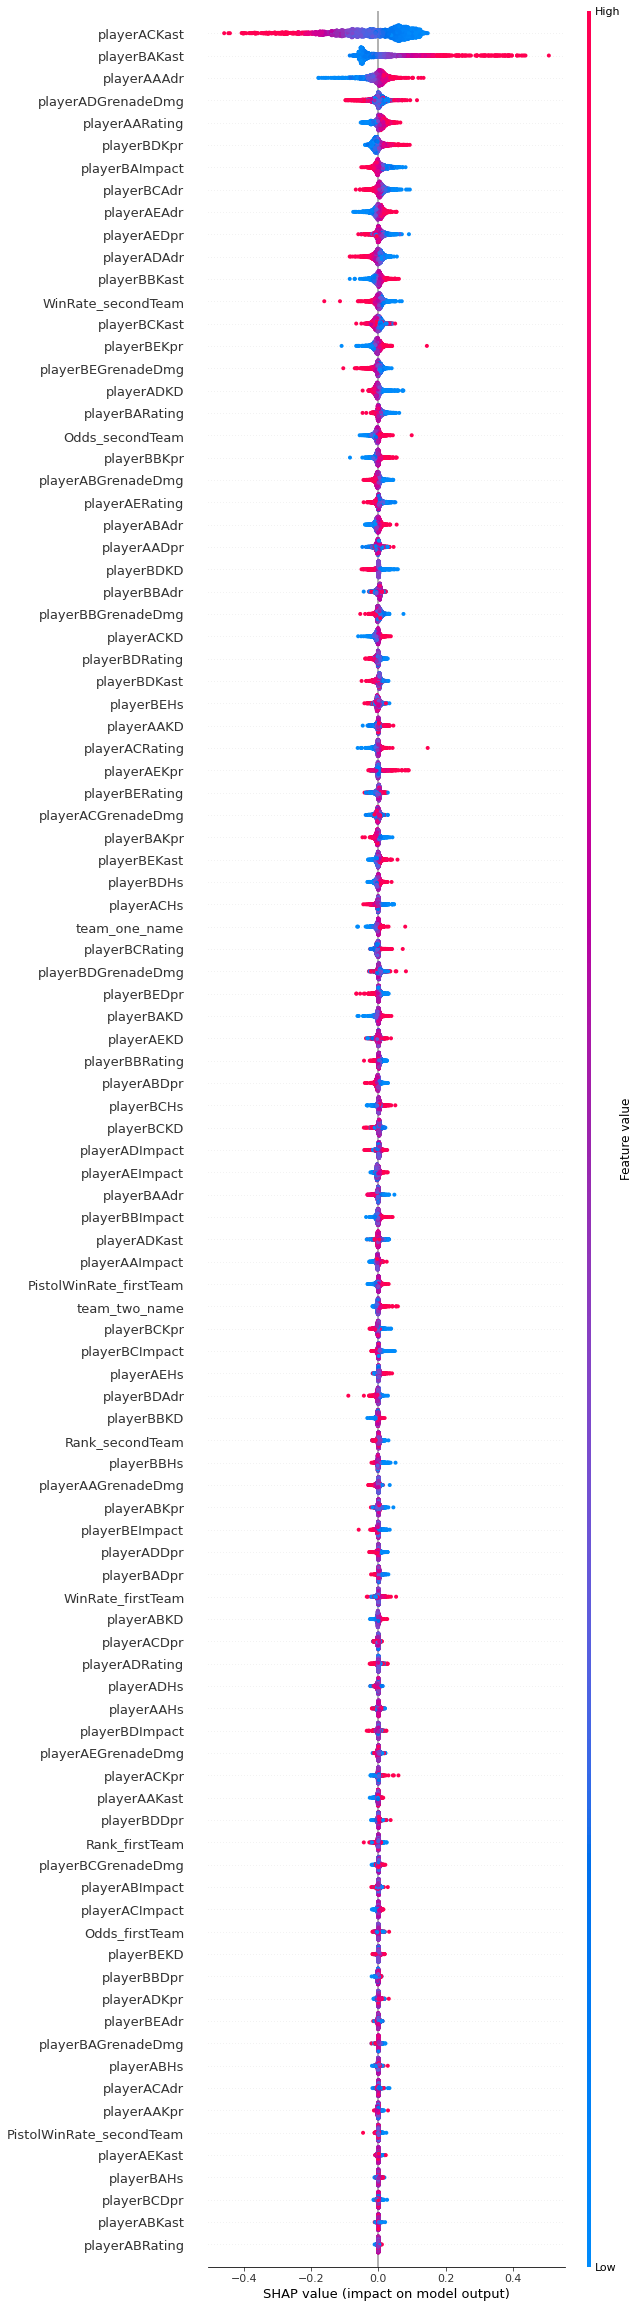

In [7]:
import shap
import xgboost

CSV_COLUMN_NAMES2=['Odds_firstTeam','Odds_secondTeam','Rank_firstTeam','Rank_secondTeam','WinRate_firstTeam','WinRate_secondTeam','PistolWinRate_firstTeam','PistolWinRate_secondTeam',
                  'playerAARating','playerAADpr','playerAAKast','playerAAImpact','playerAAAdr','playerAAKpr','playerAAHs','playerAAKD','playerAAGrenadeDmg',
                  'playerABRating','playerABDpr','playerABKast','playerABImpact','playerABAdr','playerABKpr','playerABHs','playerABKD','playerABGrenadeDmg',
                  'playerACRating','playerACDpr','playerACKast','playerACImpact','playerACAdr','playerACKpr','playerACHs','playerACKD','playerACGrenadeDmg',
                  'playerADRating','playerADDpr','playerADKast','playerADImpact','playerADAdr','playerADKpr','playerADHs','playerADKD','playerADGrenadeDmg',
                  'playerAERating','playerAEDpr','playerAEKast','playerAEImpact','playerAEAdr','playerAEKpr','playerAEHs','playerAEKD','playerAEGrenadeDmg',
                  'playerBARating','playerBADpr','playerBAKast','playerBAImpact','playerBAAdr','playerBAKpr','playerBAHs','playerBAKD','playerBAGrenadeDmg',
                  'playerBBRating','playerBBDpr','playerBBKast','playerBBImpact','playerBBAdr','playerBBKpr','playerBBHs','playerBBKD','playerBBGrenadeDmg',
                  'playerBCRating','playerBCDpr','playerBCKast','playerBCImpact','playerBCAdr','playerBCKpr','playerBCHs','playerBCKD','playerBCGrenadeDmg',
                  'playerBDRating','playerBDDpr','playerBDKast','playerBDImpact','playerBDAdr','playerBDKpr','playerBDHs','playerBDKD','playerBDGrenadeDmg',
                  'playerBERating','playerBEDpr','playerBEKast','playerBEImpact','playerBEAdr','playerBEKpr','playerBEHs','playerBEKD','playerBEGrenadeDmg','team_one_name','team_two_name']
shap.initjs()
#explainer = shap.Explainer(model.predict, X_train)
#shap_values = explainer.shap_values(np.array([[1.8,1.9,26,23,0.63,0.64,0.509,0.591,1.16,0.68,0.7,1.26,84.3,0.75,0.5,1.11,7.4,1.13,0.64,0.72,1.11,78.0,0.72,0.57,1.13,3.2,1.0,0.67,0.69,0.95,69.3,0.64,0.58,0.95,4.2,0.99,0.65,0.69,0.95,67.7,0.62,0.58,0.94,3.3,1.07,0.66,0.7,1.0675000000000001,74.825,0.6825,0.5575,1.0325000000000002,4.525,1.23,0.6,0.75,1.26,79.4,0.77,0.31,1.29,3.4,1.24,0.61,0.77,1.15,82.8,0.82,0.52,1.35,3.4,1.14,0.62,0.73,1.11,76.1,0.72,0.5,1.16,5.2,1.0,0.68,0.7,0.98,70.2,0.61,0.51,0.90,3.9,0.98,0.69,0.69,0.96,71.7,0.6,0.48,0.87,5.3]])

keras_explainer = shap.DeepExplainer(model, shap.sample(X_train, 10))
keras_shap_values = keras_explainer.shap_values(X_test)

values = keras_shap_values[0]
base_values = [keras_explainer.expected_value[0]]*len(keras_shap_values[0])

tmp = shap.Explanation(values = np.array(values, dtype=np.float32),
                       base_values = np.array(base_values, dtype=np.float32),
                       data=np.array(X_train),
                       feature_names=CSV_COLUMN_NAMES2)

#shap.plots.waterfall(tmp[5])
#shap.plots.bar(tmp,max_display=98)
shap.summary_plot(tmp, X_test,max_display=100)

In [13]:
Xnew=np.array([[3.0,1.35,44,31,0.47,0.58,0.455,0.541,1.1,0.62,0.71,1.1,73.4,0.68,0.27,1.11,4.1,1.09,0.65,0.71,1.02,78.8,0.71,0.48,1.09,3.6,0.99,0.7,0.68,1.0,72.0,0.64,0.6,0.93,4.2,0.96,0.71,0.68,0.89,72.2,0.63,0.55,0.88,3.5,1.0350000000000001,0.6699999999999999,0.6950000000000001,1.0025,74.1,0.665,0.47500000000000003,1.0025000000000002,3.8499999999999996,1.17,0.69,0.73,1.23,84.7,0.75,0.6,1.08,4.9,1.08,0.61,0.69,1.07,69.7,0.71,0.29,1.15,3.2,1.07,0.63,0.72,1.0,71.6,0.67,0.59,1.06,3.7,1.06,0.67,0.71,1.03,75.4,0.69,0.55,1.02,3.1,0.87,0.69,0.66,0.76,65.3,0.54,0.5,0.79,6.4],
                [1.36,3.00,41,51,0.36,0.45,0.462,0.5,1.07,0.65,0.68,1.14,71.5,0.7,0.53,1.09,2.8,0.99,0.65,0.7,0.96,65.0,0.62,0.27,0.96,2.6,0.99,0.71,0.68,0.98,74.7,0.64,0.51,0.90,5.1,0.95,0.66,0.66,0.88,68.0,0.62,0.4,0.94,3.3,0.87,0.7,0.66,0.8,67.5,0.52,0.36,0.75,3.5,1.04,0.72,0.68,1.11,75.8,0.71,0.63,0.99,3.8,1.03,0.69,0.67,1.03,74.4,0.7,0.56,1.02,3.1,1.02,0.69,0.66,1.07,75.4,0.67,0.48,0.97,5.5,0.98,0.69,0.67,0.93,71.5,0.64,0.31,0.92,4.5,0.89,0.71,0.68,0.77,65.3,0.56,0.64,0.79,3.6],
                [1.38,2.77,47,74,0.42,0.47,0.54,0.5,1.07,0.74,0.64,1.28,80.8,0.73,0.52,0.98,2.9,1.04,0.67,0.7,0.94,78.3,0.69,0.56,1.03,4.8,1.02,0.66,0.69,1.04,71.5,0.66,0.53,1.01,3.0,0.94,0.65,0.69,0.85,63.8,0.57,0.47,0.88,3.9,0.89,0.72,0.67,0.8,65.2,0.6,0.34,0.83,3.9,1.11,0.63,0.71,1.14,76.5,0.75,0.21,1.19,2.5,1.07,0.68,0.69,1.18,76.1,0.72,0.56,1.07,4.1,1.07,0.73,0.68,1.23,81.6,0.72,0.43,0.98,3.5,0.96,0.69,0.69,0.95,71.4,0.62,0.53,0.89,4.3,0.85,0.67,0.68,0.69,63.8,0.54,0.41,0.80,4.9],
                [2.45,1.53,27,16,0.61,0.62,0.54,0.481,1.11,0.63,0.7,1.16,74.7,0.72,0.3,1.13,5.8,1.1,0.61,0.73,0.98,75.5,0.67,0.43,1.11,7.5,1.09,0.69,0.7,1.14,79.1,0.69,0.58,1.01,7.8,1.05,0.67,0.69,1.07,74.8,0.67,0.61,1.00,5.7,1.02,0.63,0.7,0.96,69.3,0.64,0.55,1.02,4.3,1.1,0.65,0.71,1.08,77.1,0.71,0.54,1.08,4.1,1.08,0.64,0.74,0.99,75.8,0.67,0.38,1.04,6.1,1.06,0.67,0.7,1.06,75.7,0.67,0.52,0.99,5.9,1.02,0.65,0.71,0.97,69.0,0.66,0.43,1.01,3.3,1.065,0.6525,0.715,1.0250000000000001,74.39999999999999,0.6775,0.46749999999999997,1.03,4.8500000000000005],
                [3.50,1.28,42,12,0.5,0.55,0.541,0.447,1.18,0.62,0.69,1.32,78.7,0.76,0.32,1.22,4.8,1.08,0.67,0.73,1.0,76.8,0.71,0.52,1.06,3.4,1.06,0.62,0.72,0.93,73.4,0.69,0.49,1.12,4.0,1.0,0.76,0.67,1.15,76.9,0.65,0.61,0.85,6.4,0.75,0.72,0.64,0.63,53.8,0.47,0.41,0.65,3.9,1.22,0.7,0.7,1.39,88.5,0.82,0.61,1.17,2.9,1.2,0.6,0.75,1.19,81.7,0.74,0.38,1.23,6.0,1.06,0.63,0.7,1.05,72.0,0.67,0.34,1.06,4.9,0.99,0.62,0.7,0.89,67.8,0.59,0.53,0.96,4.5,0.78,0.68,0.67,0.58,54.3,0.47,0.42,0.69,4.1],
                [2.2,1.6,35,22,0.48,0.62,0.463,0.59,1.08,0.67,0.69,1.15,80.6,0.69,0.47,1.02,6.2,1.06,0.67,0.71,1.04,76.6,0.66,0.46,0.99,3.3,1.03,0.7,0.68,1.07,74.1,0.67,0.58,0.97,5.5,1.0,0.64,0.68,0.93,66.0,0.66,0.35,1.03,3.1,1.0425,0.67,0.6900000000000001,1.0474999999999999,74.32499999999999,0.67,0.46499999999999997,1.0025,4.525,1.23,0.6,0.75,1.25,79.2,0.77,0.31,1.28,3.4,1.22,0.61,0.76,1.14,81.8,0.81,0.53,1.31,3.3,1.12,0.63,0.72,1.1,75.2,0.71,0.51,1.13,5.3,1.0,0.68,0.71,0.97,70.2,0.61,0.51,0.89,3.9,0.98,0.69,0.69,0.97,72.0,0.6,0.48,0.88,5.3],
               [1.44,2.62,7,21,0.46,0.1,0.556,0.5,1.2,0.62,0.72,1.23,80.3,0.79,0.49,1.28,0.8,1.08,0.69,0.69,1.1,81.3,0.66,0.57,0.96,6.6,1.0,0.63,0.73,0.84,67.7,0.6,0.52,0.95,2.8,0.92,0.65,0.64,0.92,60.6,0.59,0.31,0.92,3.7,0.92,0.7,0.67,0.84,67.7,0.6,0.51,0.86,4.4,0.95,0.71,0.67,0.91,71.4,0.65,0.56,0.91,4.5,0.94,0.78,0.64,1.03,73.5,0.65,0.49,0.83,2.3,0.92,0.74,0.62,0.97,72.1,0.61,0.6,0.82,3.8,0.89,0.64,0.68,0.81,55.5,0.55,0.31,0.85,1.3,0.78,0.71,0.66,0.69,56.5,0.46,0.47,0.65,4.2]
               ])
Xnew=norm.fit_transform(Xnew)
Xnew = scaler.fit_transform(Xnew)

ynew=(model.predict([Xnew]))
#ynew=(model.predict_classes([Xnew]))
print(ynew)

Consider rewriting this model with the Functional API.
[[0.03395638]
 [0.00951949]
 [0.42187774]
 [0.02709135]
 [0.9978739 ]
 [0.12945989]
 [0.19540662]]
